# Topic:Customer Attrition Analysis

# INTRODUCTION

       Customer attrition(also known as customer churn) is one of the most important and challenging issues for businesses such as credit card companies, cable service providers, SASS, and telecommunications.
       
       Verizonet, a telecommunications company based in California, America, , has been operating for six years, providing phone and internet services to customers across more than a thousand cities and zip codes. . Despite a highly skilled sales team successfully attracting new clients, the company faces a significant challenge: a high customer attrition rate. At the end of the last quarter, only 43% of newly acquired customers chose to continue their services, resulting in a decrease in the total customer base.
    
        For Telicommunication companies it is key to attract new customers and at the same time avoid contract terminations (=churn) to grow their revenue generating base. Looking at churn, different reasons trigger customers to terminate their contracts, for example better price offers, more interesting packages, bad service experiences or change of customers’ personal situations.
    
        Churn analytics provide valuable capabilities for predicting customer churn and defining the root causes that drive it. The churn metric is shown as the percentage of customers who cancel a product or service within a specified period of time.
    
        The preset study was aimed at to develop the mechine learning models To predict the potential departure of customers from Verizonet telecommunications, analyse customer influencing factors and recommend customized retention strategies. The pipeline used for this study consists of 7 steps.

# AIM AND OBJECTIVES

Aim:

         To predict the potential departure of customers from Verizonet telecommunications, analyze customer influencing 
    factors and recommend customized retention strategies.

Objectives:

       1. Data Reading
    
       2. Exploratory Data Analysis and Data Cleaning
        
       3. Data Visualization
       
       4. Data Labeling
       
       5. Correlation Matrix
    
       6. Splitting the data in training and testing sets
        
       7. Model Selection, Training, Prediction and Assessment
        
            1. Logistic Regression
            2. Decision Tree Classifier
            3. Random Forest Classifier
            4. K-Nearest Neighbors Classifier
            5. Support vector classifier
      
      8. Recommend customized retention strategies

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
#import the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 1. Data Reading

In [2]:
data=pd.read_csv(r"C:\Users\ano_k\Entri class\verizonet_data.csv")

The first step of the analysis consists of reading the dataset in the Pandas dataframe using the pd.read_csv(pd=Pandas) function.

# 2. Exploratory Data Analysis and Data Cleaning

In [3]:
data.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0


Head()method is used to display the first 5 rows of the dataset, and also displayed the column names.

In [4]:
data.tail()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
7038,2569-WGERO,No,0,72,NaN,Yes,22.77,No,No,NaN,...,Landers,92285,2182,0,5306,NaN,NaN,0,0,NaN
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,Adelanto,92301,18980,0,2140,NaN,NaN,2,0,NaN
7040,2234-XADUH,Yes,4,72,NaN,Yes,29.66,Yes,Yes,Cable,...,Amboy,92304,42,0,5560,NaN,NaN,2,0,4.0
7041,4801-JZAZL,Yes,1,11,NaN,No,0.00,No,Yes,DSL,...,Angelus Oaks,92305,301,0,2793,NaN,NaN,0,0,NaN
7042,3186-AJIEK,No,0,66,NaN,Yes,30.96,No,Yes,Fiber Optic,...,Apple Valley,92308,28819,0,5097,NaN,NaN,1,2,NaN


Tail()method is used to display the last 5 rows of the dataset.

In [5]:
# The shape of the dataset
print("No of rows:",data.shape[0])
print("No of columns:",data.shape[1])

No of rows: 7043
No of columns: 43


Shape()method is used to identify the number of rows and columns. This dataset contains 7043 rows and 43 columns.

In [6]:
data.keys()

Index(['Customer ID', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'City', 'Zip Code',
       'Population', 'Churn Status', 'CLTV', 'Churn Category', 'Churn Reason',
       'Total Customer Svc Requests', 'Product/Service Issues Reported',
       'Customer Satisfaction rate'],
      dtype='object')

The keys()function returns an Index object with the column names. The index object is like a list, with column names as list items.

In [7]:
# Feature information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
This dataset contains 7043 entries (0-7042), total column is 43, this dataset has 3 datatypes namely 10 int, 7 float and 26 object types memory usage is 2.3+ MB.Column names are also displayed

In [8]:
for column in data.columns:
    print('Column Name: {} - Unique Values: {}'.format(column, data[column].unique()))

Column Name: Customer ID - Unique Values: ['8779-QRDMV' '7495-OOKFY' '1658-BYGOY' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Column Name: Referred a Friend - Unique Values: ['No' 'Yes']
Column Name: Number of Referrals - Unique Values: [ 0  1  6  2  4  3  7  5  8  9 10 11]
Column Name: Tenure in Months - Unique Values: [ 1  8 18 25 37 27 58 15  7 11  3 13 16 24  4 32 54  2 21 55  5 20 65 49
 43 56 52 33 30 46  9 10 35 44 62 14 12 17 39 68 34 22 19 23 42 41 57 38
 29 66 69 40 31 59 36 45 53 70 47 50 51 72 26  6 28 48 61 71 60 64 67 63]
Column Name: Offer - Unique Values: [nan 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
Column Name: Phone Service - Unique Values: ['No' 'Yes']
Column Name: Avg Monthly Long Distance Charges - Unique Values: [ 0.   48.85 11.33 ... 44.99 44.98  8.62]
Column Name: Multiple Lines - Unique Values: ['No' 'Yes']
Column Name: Internet Service - Unique Values: ['Yes' 'No']
Column Name: Internet Type - Unique Values: ['Fiber Optic' 'Cable' 'DSL' nan]
Column

About the dataset:
    
    1.Customer Id: All customers are assigned a customer ID
    
    2.Referred a Friend : If the customer is referred to someone else
    
    3.Number of Referrals:How many of their friends have customers referred
    
    4.Tenure in Months:Number of months the customer has remained with the connection
    
    5.Offer: Offers made to consumers
    
    6.Phone Service: If the customer has a phone service
    
    7.Avg Monthly Long Distance Charges: Average amount levied to the customer per month as long distance charge
    
    8.Multiple Lines:If the customer has multiple lines
    
    9.Internet Service:If the customer has internet service
    
    10.Internet Type:If the customer has internet service, what type of internet was provided to them
    
    11.Avg Monthly GB Download:What is the average monthly GB downloaded by the customer
    
    12.Online Security:If the consumer has online security
    
    13.Online Backup: If the customer has an online tie-up
    
    14.Device Protection Plan: If the customer has device security
    
    15.Premium Tech Support:If the customer has premium technical support
    
    16.Streaming TV:If the customer has streaming TV
    
    17.Streaming Movies: If the customer has streaming movies
    
    18.Streaming Music:If the customer has streaming music
    
    19.Unlimited Data: The customer is provided with unlimited data pack
    
    20.Contract:The duration of the customer's contract
    
    21.Paperless Billing:If the customer has paperless billing
    
    22.Payment Method:Customer’s payment method
    
    23.Monthly Charge:Amount levied to the customer per month
    
    24.Total Regular Charges:Regular charges levied from customers
    
    25.Total Refunds:Total refunds issued to a customer
    
    26.Total Extra Data Charges:Total additional data charges charged to a customer
    
    27.Total Long Distance Charges:Total long distance charges charged to a customer
    
    28.Gender: If the customer is a male or a female
    
    29.Age:Age of the customer
    
    30.Under 30:If the age of the customer is less than 30 years
    
    31.Senior Citizen:If the customer is a senior citizen
    
    32.Married:Whether the customer is married or not
    
    33.Dependents:If the customer has dependents
    
    34.City:Customers city
    
    35.Zip Code:Pin code of customer city
    
    36.Population:Population of the zipcoded area
    
    37.Churn Status:Whether the customer is churned or not
    
    38.CLTV:The present value of the future cash flows or the value of business attributed to the customer during his or her            entire relationship with the company
    
    39.Churn Category:Category where a customer churned from the company
    
    40.Churn Reason:Reason where a customer churned from the company
    
    41.Total Customer Svc Requests:Number of customer Svc request from a customer
    
    42.Product/Service Issues Reported:No of product/service issues reported 
    
    43.Customer Satisfaction rate:Rating of customer satisfaction    

In [9]:
data[data.duplicated()]

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate


duplicated() method helps in analyzing duplicate values only.There are no duplicate rows in this dataset.

In [10]:
#Checking null values
data.isnull().sum()

Customer ID                             0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                          0
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                          0
Total Regular Charges             

The isnull() method is used to check for any null values present in the dataset. This data contains 4 columns with some invalid values.

In [11]:
def fill_missing_values(data):
    columns_to_fill = {
        'Offer': 'None',
        'Internet Type': 'None',
        'Churn Category': 'None',
        'Churn Reason': 'None',
        'Customer Satisfaction rate': 0
    }
    for column, fill_value in columns_to_fill.items():
        data[column].fillna(fill_value, inplace=True)
    return data
data=fill_missing_values(data)

In [12]:
data.isnull().sum()

Customer ID                          0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges 

In [13]:
data.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,Los Angeles,90022,68701,1,5433,Competitor,Competitor offered more data,5,0,0.0
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,Los Angeles,90063,55668,1,5302,Competitor,Competitor made better offer,5,0,0.0
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,Los Angeles,90065,47534,1,3179,Competitor,Competitor made better offer,1,0,0.0
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,Inglewood,90303,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,Whittier,90602,26265,1,2793,Price,Extra data charges,1,0,2.0


In [14]:
 # Check the descriptive statistics of the numerical variables
data.describe().round(2)

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Zip Code,Population,Churn Status,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,1.95,32.39,22.96,21.11,65.54,2280.38,1.96,278.50,749.10,46.51,93486.07,22139.60,0.27,4400.30,1.34,0.31,0.78
std,3.00,24.54,15.45,20.95,30.61,2266.22,7.90,685.04,846.66,16.75,1856.77,21152.39,0.44,1183.06,1.43,0.72,1.47
min,0.00,1.00,0.00,0.00,18.25,18.80,0.00,0.00,0.00,19.00,90001.00,11.00,0.00,2003.00,0.00,0.00,0.00
25%,0.00,9.00,9.21,3.00,35.89,400.15,0.00,0.00,70.54,32.00,92101.00,2344.00,0.00,3469.00,0.00,0.00,0.00
50%,0.00,29.00,22.89,17.00,71.97,1394.55,0.00,0.00,401.44,46.00,93518.00,17554.00,0.00,4527.00,1.00,0.00,0.00
75%,3.00,55.00,36.39,28.00,90.65,3786.60,0.00,182.62,1191.10,60.00,95329.00,36125.00,1.00,5380.50,2.00,0.00,1.00
max,11.00,72.00,49.99,94.00,123.08,8684.80,49.79,6477.00,3564.72,80.00,96150.00,105285.00,1.00,6500.00,9.00,6.00,5.00


describe() is used to view some basic statistical details like percentile(25%,50%,75%), mean, std, etc. of series of numeric values and also displayed the maximum value from the respective column.From the above data we can understand all column with numeric values and there statistical informations.

In [15]:
# Analyse the churn status column
data["Churn Status"].value_counts()

Churn Status
0    5174
1    1869
Name: count, dtype: int64

In this dataset we can understans 1869 customers are churned from the company, 5174 are existing customers.

In [16]:
data.drop(columns='Customer ID',inplace=True)

# 3. Data Visualization

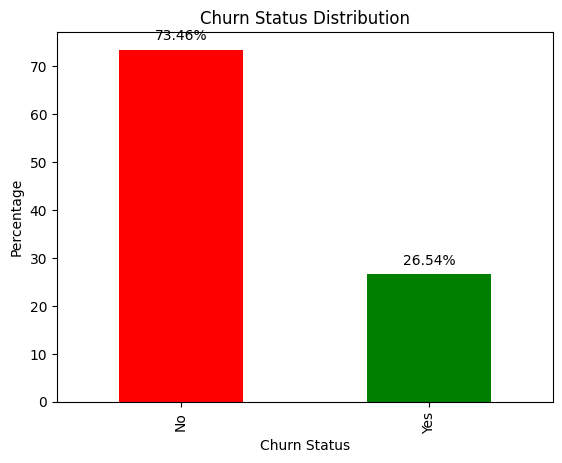

In [17]:
#Churn distribution
data['Churn Status'] = data['Churn Status'].map({0: 'No', 1: 'Yes'})
churn_percentage = data['Churn Status'].value_counts(normalize=True) * 100
ax = churn_percentage.plot(kind='bar', color=['red', 'green'])
plt.title('Churn Status Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Percentage')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Here We can see that the percentage for the Chuen status 'Yes' is 26.54% and churn status 'No' is 73.46%.S the 'Yes' category is very less as compared to 'No'.

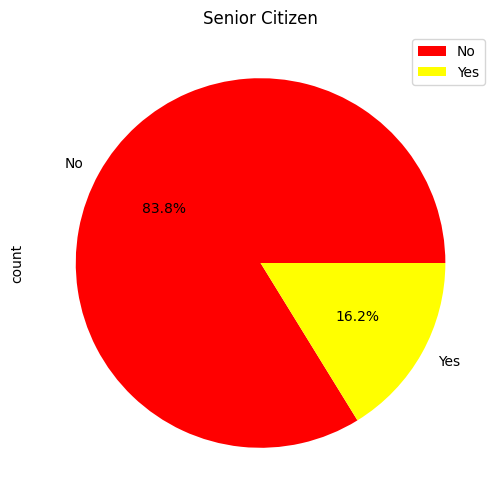

In [18]:
#Distribution of Senior Citizen
color=['red','yellow']
data['Senior Citizen'].value_counts().plot(kind='pie',colors=color,figsize=(8,6),autopct='%1.1f%%')
plt.title('Senior Citizen')
plt.legend()

The above pie chart shows the distribution of senior citizen customers, from the chart we can understand that 83.8% of the customers are non-senior citizens and the remaining 16.2% are senior citizens, so most of the connection holders are non-senior citizens.

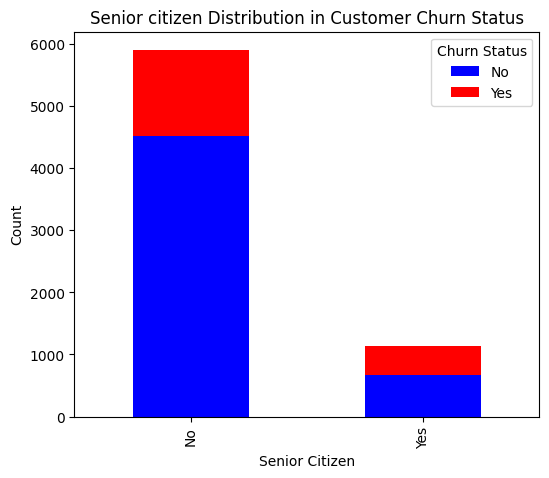

In [19]:
citizen_churn_data = data.groupby(['Senior Citizen', 'Churn Status']).size().unstack()
citizen_churn_data.plot(kind='bar', stacked=True, color=['blue', 'red'], figsize=(6,5))
plt.title('Senior citizen Distribution in Customer Churn Status')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['No', 'Yes'])
plt.show()

Most of the customers are not senior citizens.Above 50 percent of the senior citizen consumers are not churned category.

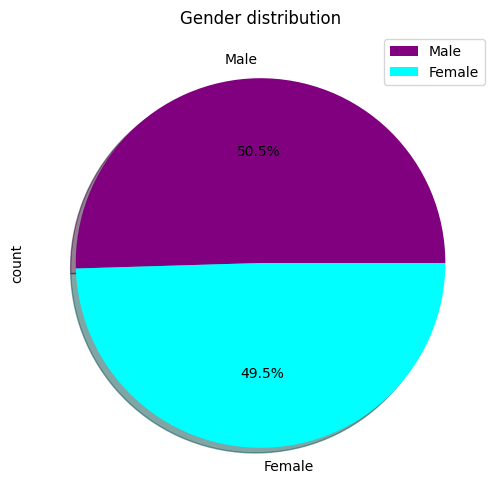

In [20]:
#Distibution of Gender
color=['purple','cyan']
data['Gender'].value_counts().plot(kind='pie',colors=color,figsize=(8,6),autopct='%1.1f%%',shadow=True)
plt.title('Gender distribution')
plt.legend()

50.5% of male customers and 49.5% of female customers. Only 1% more male customers than female customers.

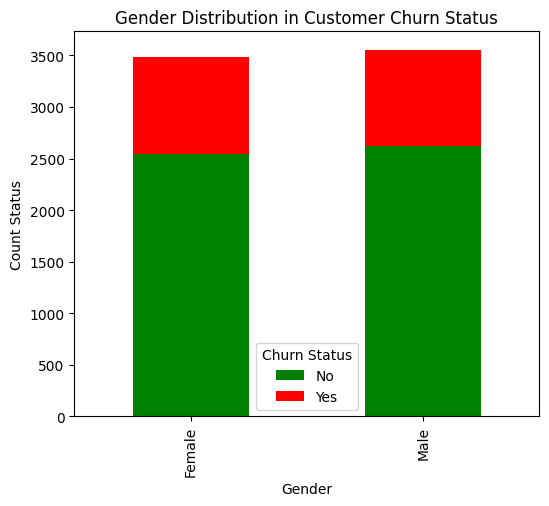

In [21]:
gender_churn_data = data.groupby(['Gender', 'Churn Status']).size().unstack()
gender_churn_data.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(6,5))
plt.title('Gender Distribution in Customer Churn Status')
plt.xlabel('Gender')
plt.ylabel('Count Status')
plt.legend(title='Churn Status', labels=['No', 'Yes'])
plt.show()

The graph above shows the churn status distribution by gender.Men and women show little difference, with the percentage of male customers slightly higher. Thatstime churn status is the same for both.

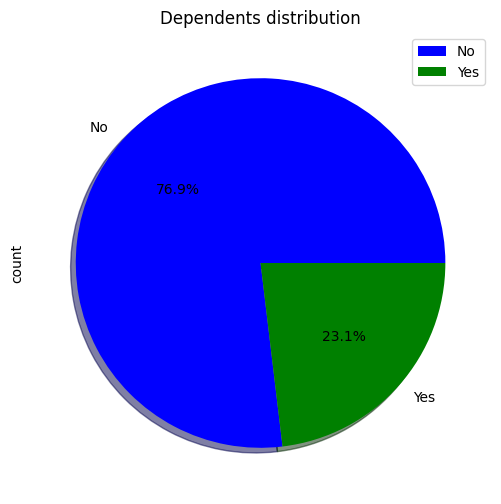

In [22]:
#Distibution of Dependence
color=['blue','green']
data['Dependents'].value_counts().plot(kind='pie',colors=color,figsize=(8,6),autopct='%1.1f%%',shadow=True)
plt.title('Dependents distribution')
plt.legend()

76.9% customers are not dependent.only 23.1% customers are dependent

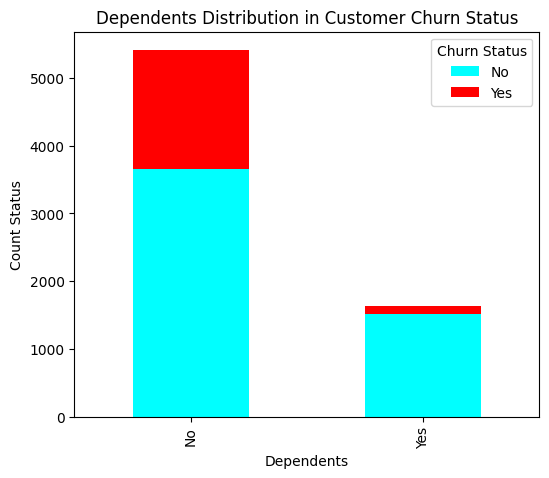

In [23]:
Dependents_churn_data = data.groupby(['Dependents', 'Churn Status']).size().unstack()
Dependents_churn_data.plot(kind='bar', stacked=True, color=['cyan', 'red'], figsize=(6,5))
plt.title('Dependents Distribution in Customer Churn Status')
plt.xlabel('Dependents')
plt.ylabel('Count Status')
plt.legend(title='Churn Status', labels=['No', 'Yes'])
plt.show()

churn status distribution by dependents analysis, we can understand Non-dependent customers churned more, but dependent consumers relatively less churned.

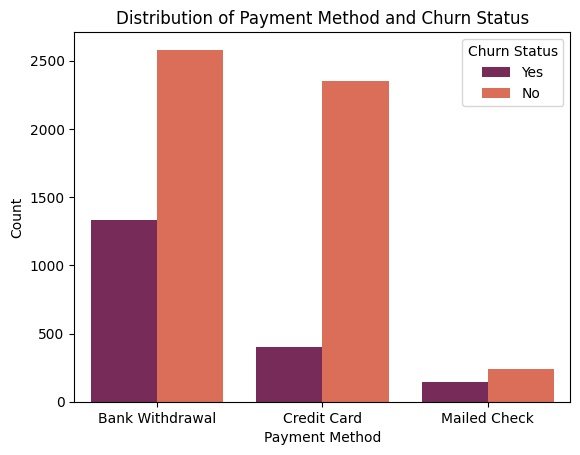

In [24]:
#Distribution of payment method and churn status
sns.countplot(data=data,x='Payment Method',hue='Churn Status',palette='rocket')
plt.title('Distribution of Payment Method and Churn Status')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

Three different payment methods are used by the customers which are bank withdrawal, credit card method and mail cheque.Most of the clients and churned customers use bank withdrawal method for payment.Mailed checks are the least used form of payment by both.

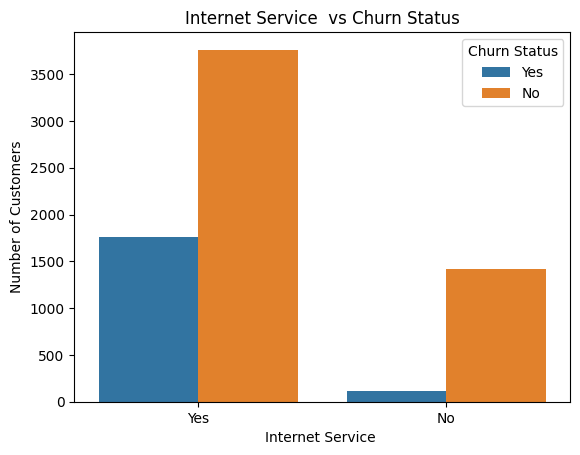

In [25]:
# churn status analysis by Internet Service 
sns.countplot(x='Internet Service',hue='Churn Status', data=data)
plt.title('Internet Service  vs Churn Status')
plt.xlabel('Internet Service ')
plt.ylabel('Number of Customers')
plt.show()

Here we can see that most of the internet service users are not churned customers.Most of the customers who left were internet service users.

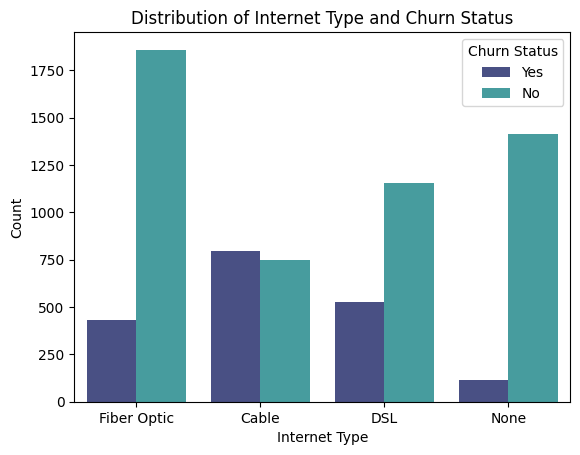

In [26]:
# Distribution of Internet type and churn status
figure=plt.figsize=(7,6)
sns.countplot(data=data,x='Internet Type',hue='Churn Status',palette='mako')
plt.title("Distribution of Internet Type and Churn Status")
plt.xlabel("Internet Type")
plt.ylabel('Count')
plt.show()

The company provides 3 types of internet facility. Cable,DSL and Fiber Optics.Most of the customers(above 1750) are currently using fiber optics internet type.But most of the customers who churned were using the cable type.Some customers are not using the internet facility.

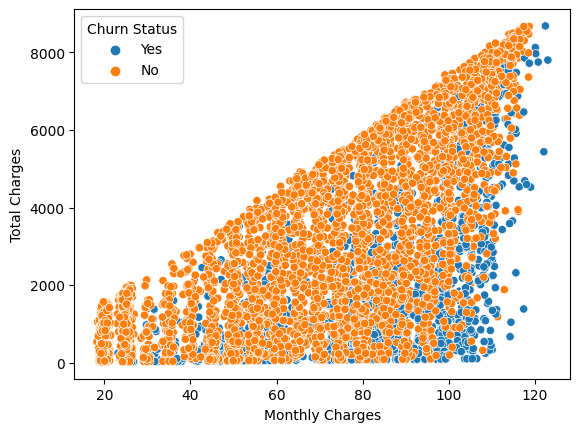

In [27]:
sns.scatterplot(x='Monthly Charge', y='Total Regular Charges', data=data, hue="Churn Status")
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

From the scatter plot one could identify that lot more customers churned when their monthly bills were rising between 70 to about 120 dollars. However lot more customers stayed when their Total Charges were rather going high.Monthly charges increases total charges also increases.

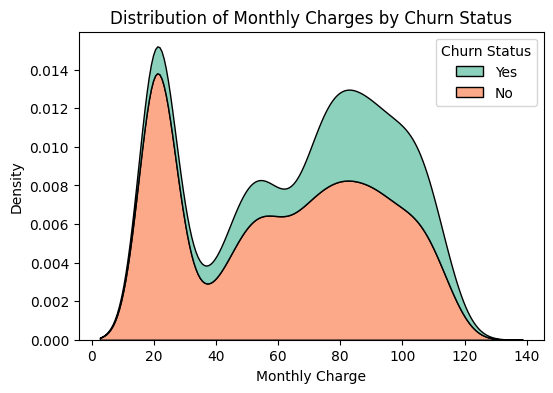

In [28]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=data, x='Monthly Charge',hue='Churn Status', multiple='stack', palette='Set2')
plt.title('Distribution of Monthly Charges by Churn Status')
plt.show()

Churn rate is increases when monthly charges increases

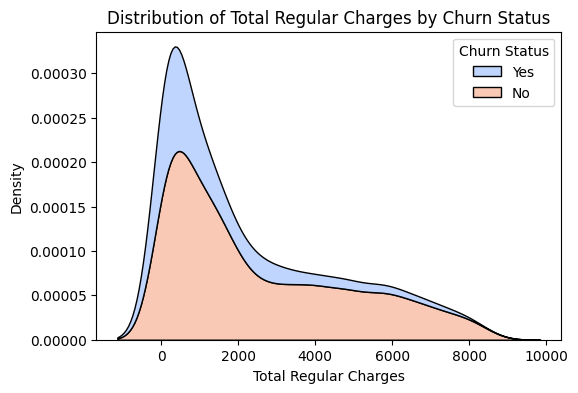

In [29]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=data, x='Total Regular Charges',hue='Churn Status', multiple='stack', palette='coolwarm')
plt.title('Distribution of Total Regular Charges by Churn Status')
plt.show()

Higher churn rate occured at lower total regular charges

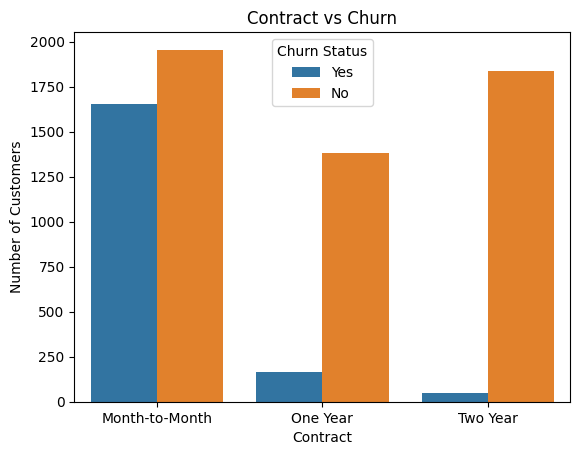

In [30]:
sns.countplot(x='Contract', hue='Churn Status', data=data)
plt.title('Contract vs Churn')
plt.xlabel('Contract')
plt.ylabel('Number of Customers')
plt.show()

We noticed that the longer the contract duration, the lower the churn rate. This might probably be due to the fact that customers pay more when they sign on to Monthly contracts.

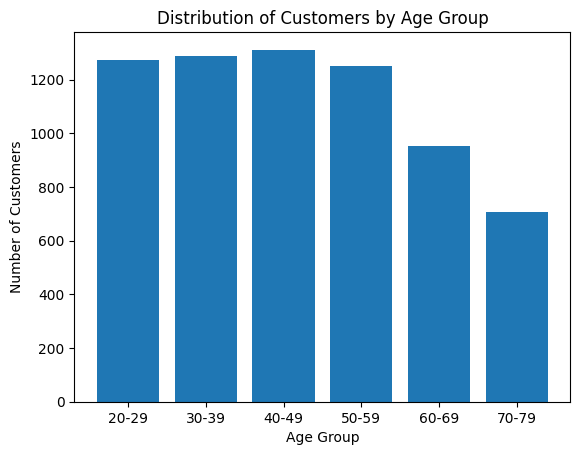

In [31]:
#Most of the customers belongs to which age group?
age_grp=pd.cut(data['Age'],bins=[20,30,40,50,60,70,80],labels=['20-29','30-39','40-49','50-59','60-69','70-79'])
age_grp_counts=age_grp.value_counts().sort_index()
plt.bar(age_grp_counts.index, age_grp_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Age Group')
plt.show()

From the above chart we can understand that the customers are in the age group of 20-79 years. Majority of constomers in this age group are 20-59 years old.

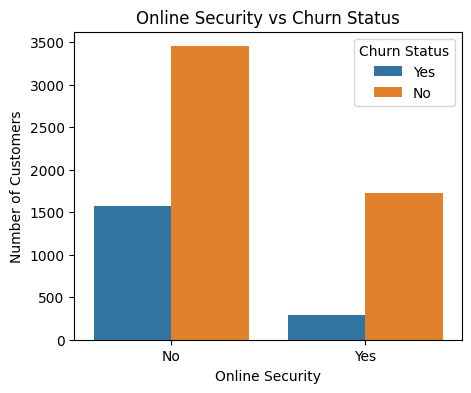

In [32]:
# churn status analysis by Online Security

plt.figure(figsize=(5,4))
sns.countplot(x='Online Security',hue='Churn Status', data=data)
plt.title('Online Security vs Churn Status')
plt.xlabel('Online Security')
plt.ylabel('Number of Customers')
plt.show()

Most of the churned and not churned customers do not have online security, some of the existing customers take online security.

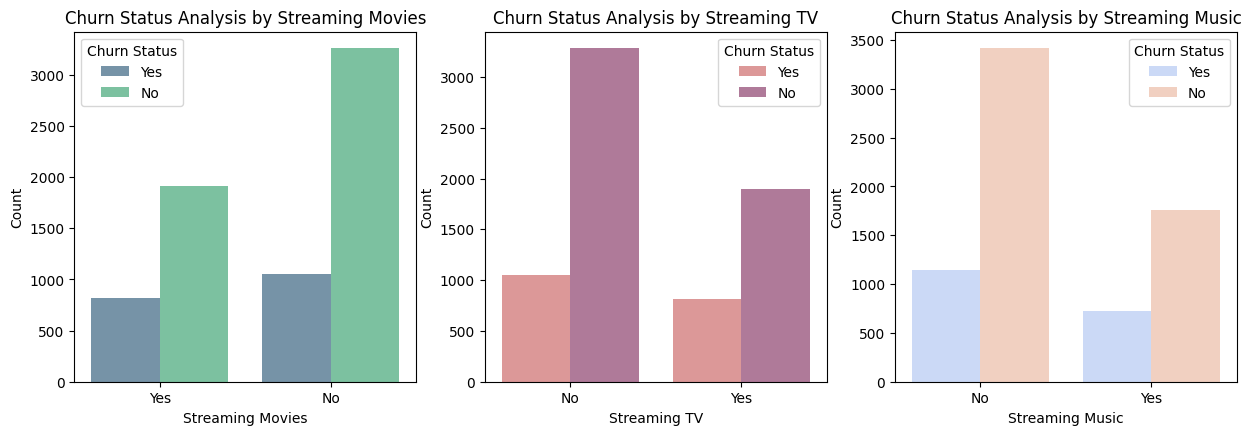

In [33]:
#Churn status analysis by streaming service
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.countplot(x='Streaming Movies', hue='Churn Status', data=data, palette='viridis', alpha=0.7)

plt.title('Churn Status Analysis by Streaming Movies')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')
plt.legend(title='Churn Status')

plt.subplot(2,3,2)
sns.countplot(x='Streaming TV', hue='Churn Status', data=data, palette='flare', alpha=0.7)
plt.title('Churn Status Analysis by Streaming TV')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.legend(title='Churn Status')

plt.subplot(2,3,3)
sns.countplot(x='Streaming Music', hue='Churn Status', data=data, palette='coolwarm',alpha=0.7)
plt.title('Churn Status Analysis by Streaming Music')
plt.xlabel('Streaming Music')
plt.ylabel('Count')

plt.show()

The above three bar graphs illustrate the streaming services provided to the customers. First graph is the churn analysis by streaming movies, second is the churn analysis by streaming TV and third one is the streaming music. from this graphs we can found Most of those who have used these services are not churn customers. Most of the non-users are not churn customers.

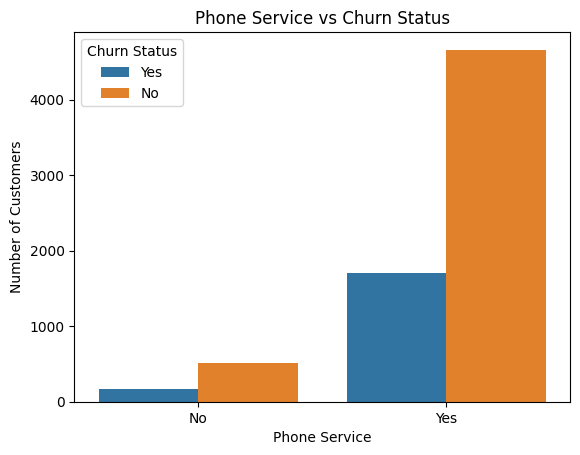

In [34]:
# churn status analysis by Phone service
sns.countplot(x='Phone Service',hue='Churn Status', data=data)
plt.title('Phone Service vs Churn Status')
plt.xlabel('Phone Service')
plt.ylabel('Number of Customers')
plt.show()

Most of the churned customers used the phone service facility.Most of the phone service fecility users are not churned customers.

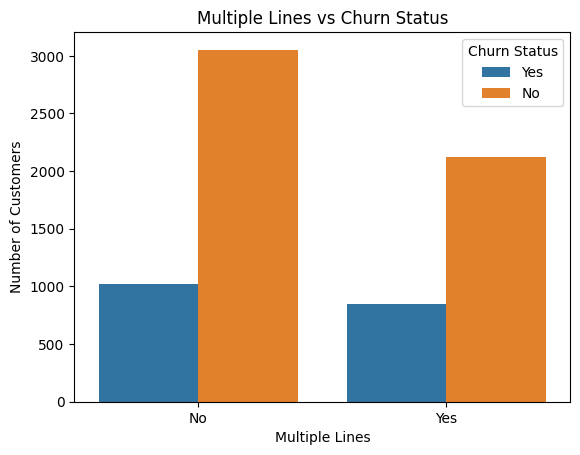

In [35]:
# churn status analysis by Multiple Lines
sns.countplot(x='Multiple Lines',hue='Churn Status', data=data)
plt.title('Multiple Lines vs Churn Status')
plt.xlabel('Multiple Lines')
plt.ylabel('Number of Customers')
plt.show()

Most of the existing customers and churned customers are those who have taken more than one line.

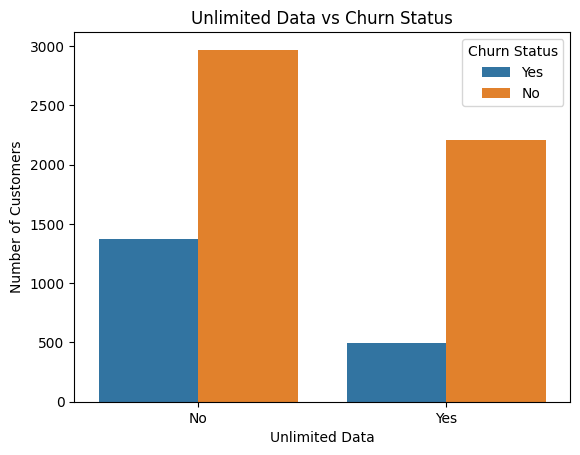

In [36]:
# churn status analysis Unlimited Data
sns.countplot(x='Unlimited Data',hue='Churn Status', data=data)
plt.title('Unlimited Data vs Churn Status')
plt.xlabel('Unlimited Data')
plt.ylabel('Number of Customers')
plt.show()

Most of the existing customers are non-users of Unlimited data benefit.Most of the churned customers also.

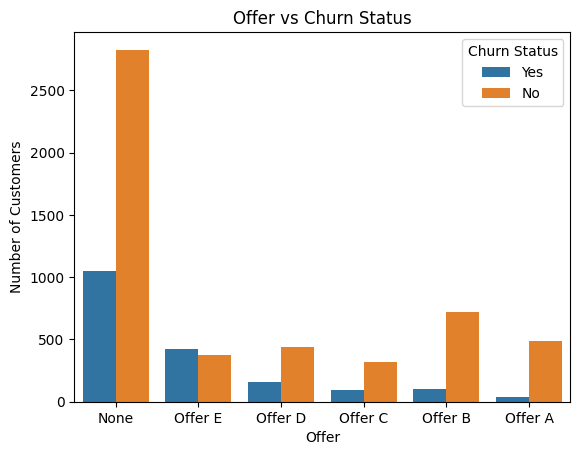

In [37]:
# churn status analysis Offer
sns.countplot(x='Offer',hue='Churn Status', data=data)
plt.title('Offer vs Churn Status')
plt.xlabel('Offer')
plt.ylabel('Number of Customers')
plt.show()

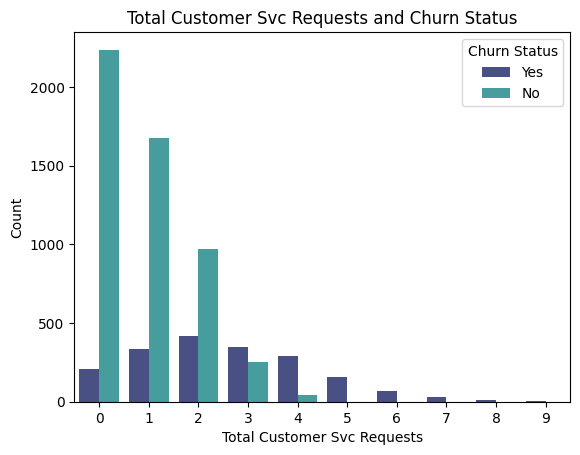

In [38]:
# Distribution of Internet type and churn status
figure=plt.figsize=(7,6)
sns.countplot(data=data,x='Total Customer Svc Requests',hue='Churn Status',palette='mako')
plt.title("Total Customer Svc Requests and Churn Status")
plt.xlabel("Total Customer Svc Requests")
plt.ylabel('Count')
plt.show()

Customers who have made multiple requests are more likely to leave.Few customers who did not give any request are also among those who churn

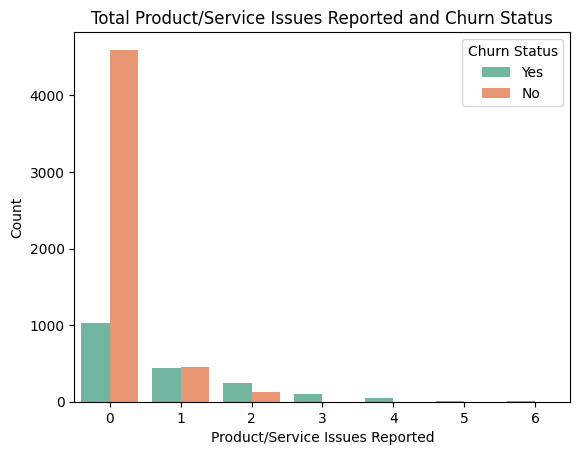

In [39]:
# Distribution of Internet type and churn status
figure=plt.figsize=(7,6)
sns.countplot(data=data,x='Product/Service Issues Reported',hue='Churn Status',palette='Set2')
plt.title("Total Product/Service Issues Reported and Churn Status")
plt.xlabel("Product/Service Issues Reported")
plt.ylabel('Count')
plt.show()

Most of the churned customers were those who did not report any issue and those who reported first or second issue.

# 4. Data Labeling  

In [40]:
#Label Encoding
label_encoder = LabelEncoder()
for i in data[["Referred a Friend","Offer","Phone Service","Multiple Lines","Internet Service","Internet Type","Online Security","Online Backup","Device Protection Plan","Premium Tech Support","Streaming TV","Streaming Movies","Streaming Music","Unlimited Data","Contract","Paperless Billing","Payment Method","Gender","Under 30","Senior Citizen","Married","Dependents","City","Churn Status","Churn Category","Churn Reason"]]:
    data[i] = label_encoder.fit_transform(data[i])
data

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,City,Zip Code,Population,Churn Status,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction rate
0,0,0,1,0,0,0.00,0,1,2,9,...,554,90022,68701,1,5433,1,5,5,0,0.0
1,1,1,8,5,1,48.85,1,1,0,19,...,554,90063,55668,1,5302,1,3,5,0,0.0
2,0,0,18,4,1,11.33,1,1,2,57,...,554,90065,47534,1,3179,1,3,1,0,0.0
3,1,1,25,3,1,19.76,0,1,2,13,...,448,90303,27778,1,5337,2,11,1,1,2.0
4,1,1,37,3,1,6.33,1,1,0,15,...,1072,90602,26265,1,2793,5,8,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,72,0,1,22.77,0,0,3,0,...,514,92285,2182,0,5306,3,15,0,0,0.0
7039,1,1,24,3,1,36.05,1,1,1,24,...,2,92301,18980,0,2140,3,15,2,0,0.0
7040,1,4,72,0,1,29.66,1,1,0,59,...,22,92304,42,0,5560,3,15,2,0,4.0
7041,1,1,11,0,0,0.00,0,1,1,17,...,26,92305,301,0,2793,3,15,0,0,0.0


# 5. Correlation Matrix

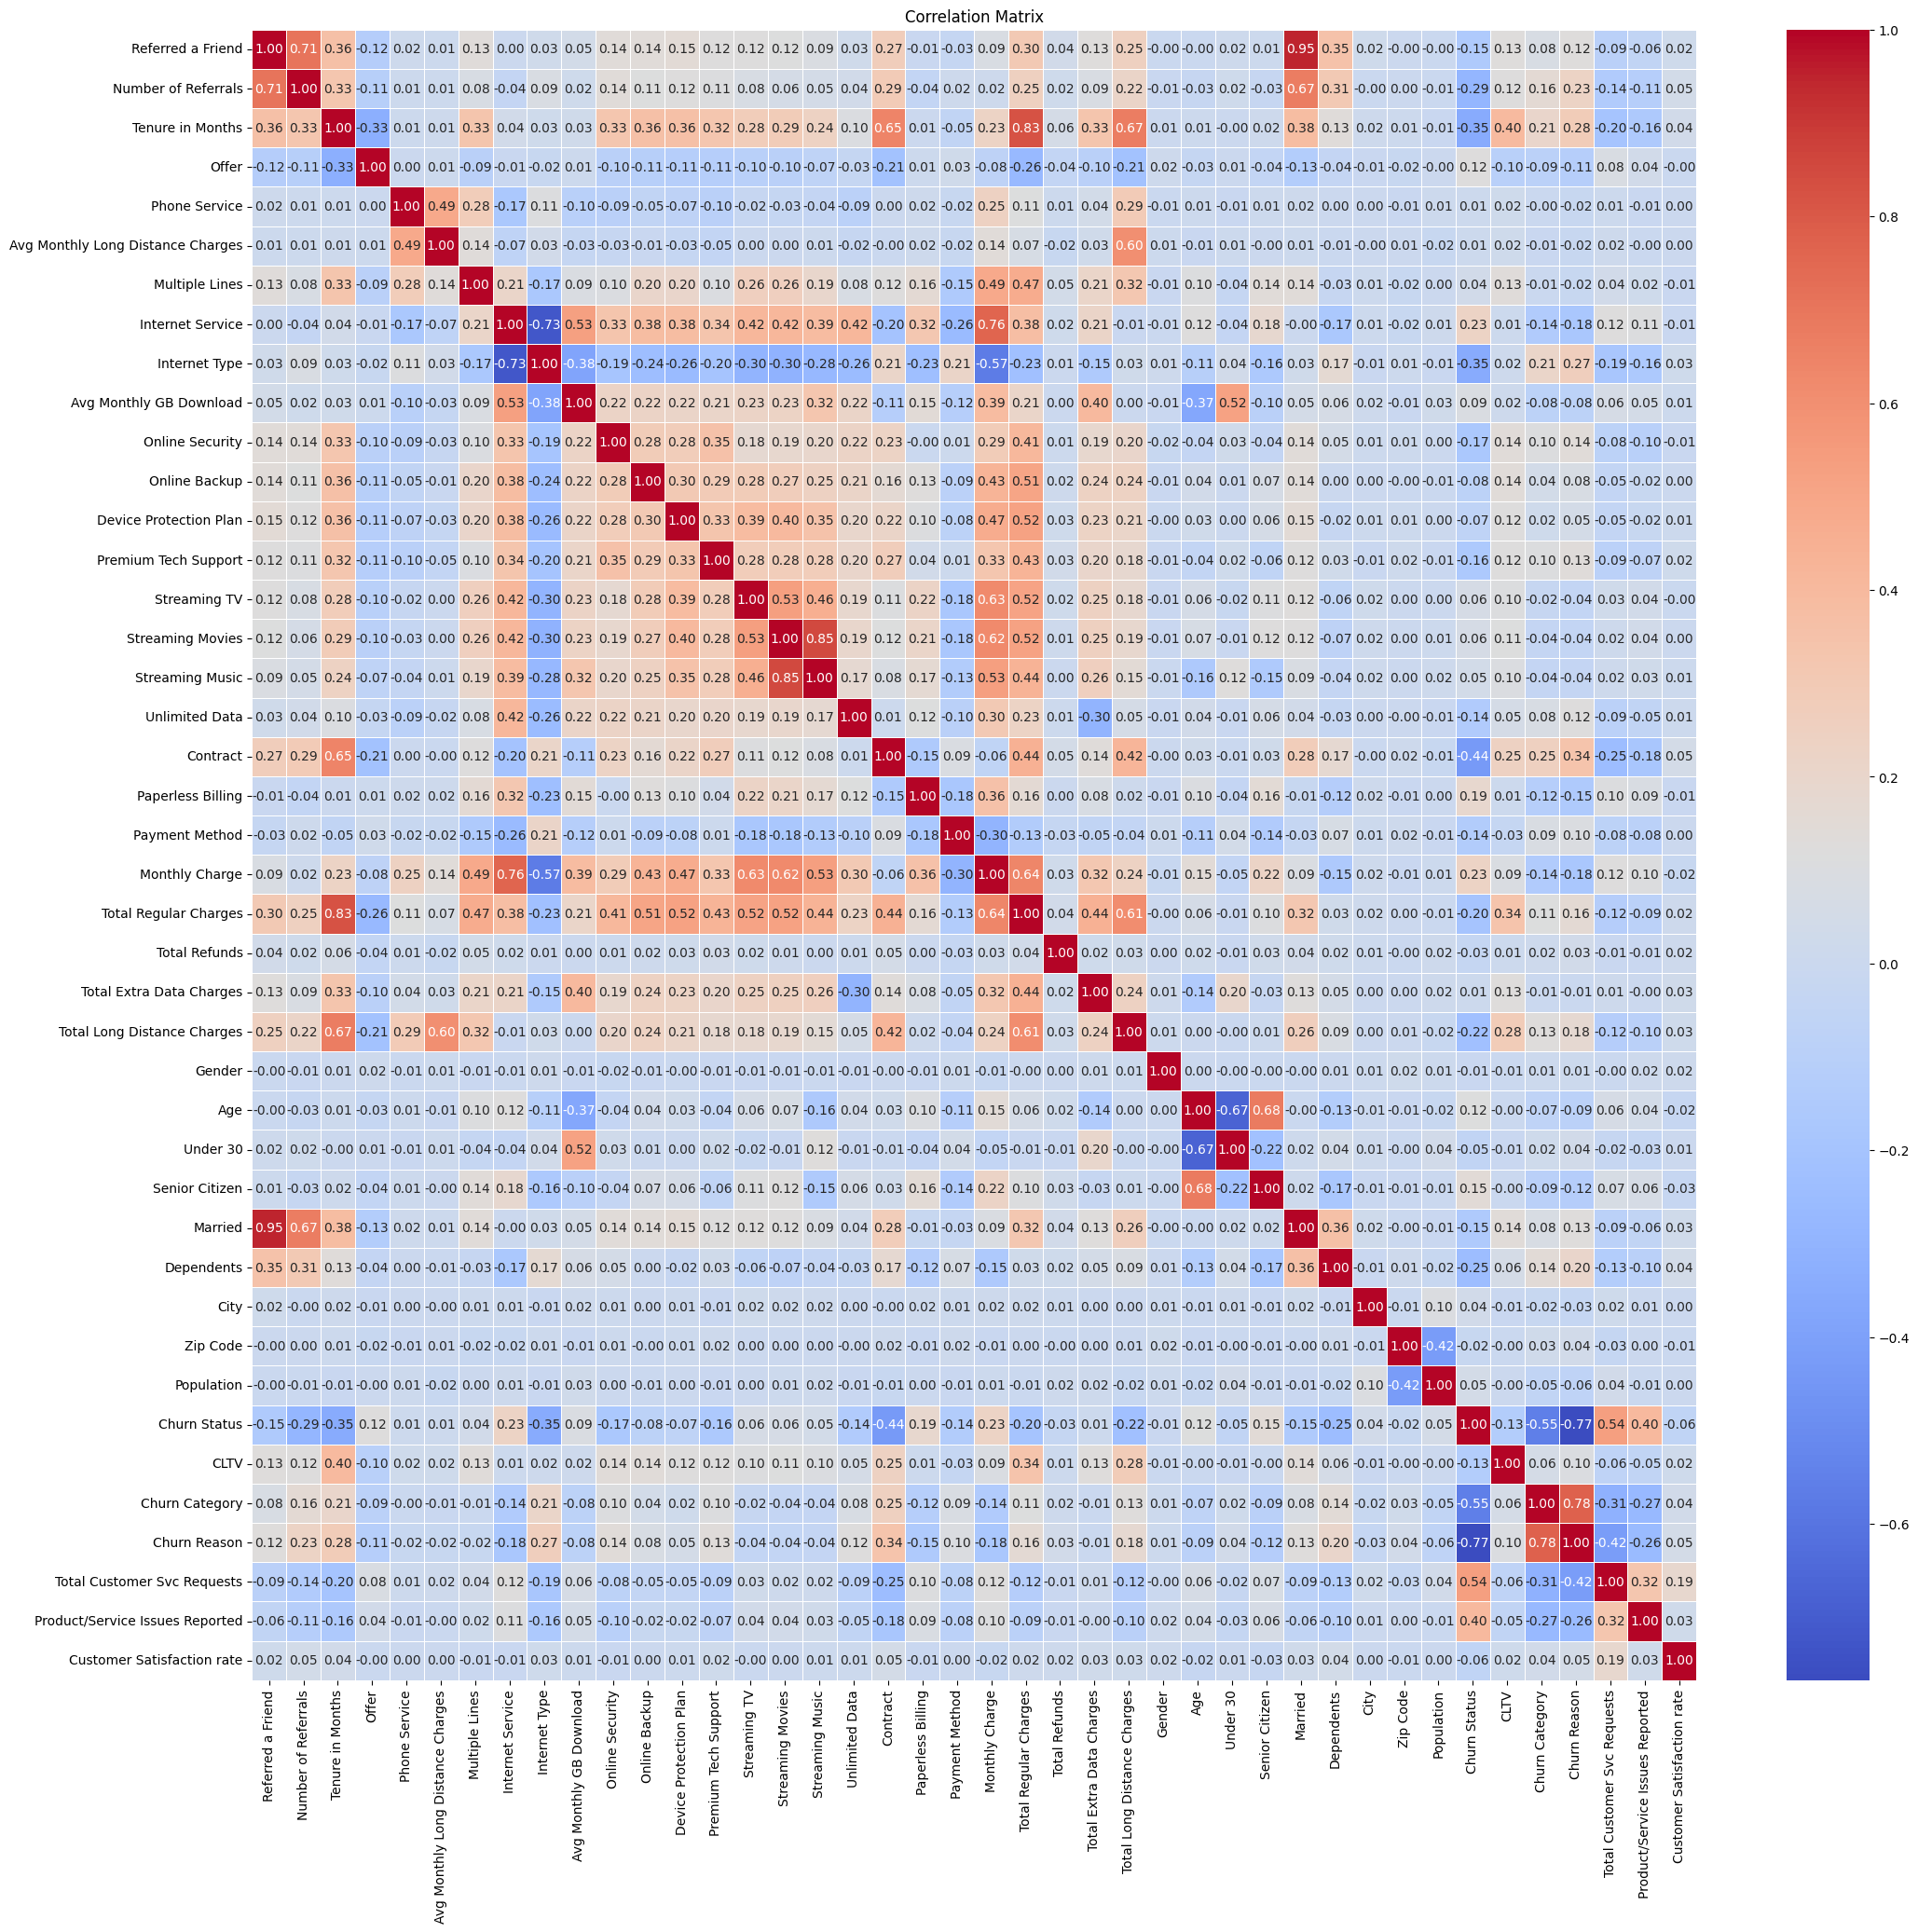

In [41]:
#Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(25,23))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Using correlation matrix we can undestand positively correlated and negatively correlated features.

# 6. Splitting the data in training and testing sets

In [42]:
# Store feature matrix in x and target in y
column=['Offer','Multiple Lines','Internet Service','Paperless Billing','Monthly Charge','Total Regular Charges','Payment Method','Premium Tech Support','Contract','Senior Citizen','Dependents','Total Customer Svc Requests','Product/Service Issues Reported']
x=data[column]
y=data['Churn Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

12 independent features are selected for the training and that are assign into the varaible'x'. Then tha target feature 'churn status' was assign into the variable 'y'.Then the train test split assign into x_train,x_test,y_train,y_test.set the test size is 0.20 that means 20% test data and 80% train data.

# 7. Model Selection, Training, Prediction and Assessment

# 7.1 Logistic Regression 

In [43]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

C:\Users\ano_k\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model assign into variable LR and fit the model with x_train,y_train.

In [44]:
y_predicted = LR.predict(x_test)
y_predicted

array([0, 0, 0, ..., 0, 1, 0])

In [45]:
LR_Accuracy_score=accuracy_score(y_test,y_predicted)
print("Accuracy score:",LR_Accuracy_score)

Accuracy score: 0.8779276082327893


In [46]:
LR_Class_Report=classification_report(y_test,y_predicted)
print("Classification Report:\n",LR_Class_Report)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1054
           1       0.78      0.72      0.75       355

    accuracy                           0.88      1409
   macro avg       0.84      0.82      0.83      1409
weighted avg       0.88      0.88      0.88      1409



From the classification report precision score:0.84, recall score:0.82,f1-score:0.83

In [47]:
print("Confusion Matrix:\n",confusion_matrix(y_test, y_predicted))

Confusion Matrix:
 [[982  72]
 [100 255]]


 The function takes two parameters, mainly y_true( the actual values) and y_pred (the targeted value return by the classifier).We can find the accuracy of the predicted result by interpreting the confusion matrix. By above output, we can interpret that 982+255=1237 (Correct Output) and 72+100=172(Incorrect Output).

# 7.2 Decision Tree Classifier

In [48]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

Model assign into variable DTC and fit the model with x_train,y_train.

In [49]:
y_predicted2=DTC.predict(x_test)
y_predicted2

array([0, 0, 0, ..., 0, 1, 0])

In [50]:
DTC_Accuracy_score=accuracy_score(y_test,y_predicted2)
print('Accuracy score:',DTC_Accuracy_score)

Accuracy score: 0.8594748048261178


In [51]:
DTC_Class_Report=classification_report(y_test,y_predicted2)
print("Classification Report:\n",DTC_Class_Report)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      1054
           1       0.72      0.73      0.72       355

    accuracy                           0.86      1409
   macro avg       0.81      0.82      0.81      1409
weighted avg       0.86      0.86      0.86      1409



From the classification report precision score:0.81, recall score:0.82,f1-score:0.81

In [52]:
print("Confusion Matrix:\n",confusion_matrix(y_test, y_predicted2))

Confusion Matrix:
 [[953 101]
 [ 97 258]]


From the confusion matrix of decision tree classifier,  we can interpret that 953+258=1211 (Correct Output) and 101+97=198(Incorrect)

# 7.3 Random Forest Classifier

In [58]:
RF=RandomForestClassifier(criterion='gini',random_state=0)
RF.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

Model assign into variable 'RF' and fit the model with x_train,y_train.

In [59]:
y_predicted3=RF.predict(x_test)
y_predicted3

array([0, 0, 0, ..., 0, 1, 1])

In [60]:
RF_Accuracy_score=accuracy_score(y_test,y_predicted3)
print('Accuracy score:',RF_Accuracy_score)

Accuracy score: 0.8985095812633073


In [62]:
RF_Class_Report=classification_report(y_test,y_predicted3)
print("Classification Report:\n",RF_Class_Report)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      1054
           1       0.82      0.76      0.79       355

    accuracy                           0.90      1409
   macro avg       0.87      0.85      0.86      1409
weighted avg       0.90      0.90      0.90      1409



From the classification report precision score:0.87, recall score:0.85,f1-score:0.86

In [64]:
print("Confusion Matrix:\n",confusion_matrix(y_test, y_predicted3))

Confusion Matrix:
 [[996  58]
 [ 85 270]]


From the confusion matrix,we can interpret that 996+270=1266 (Correct Output) and 58+85=143(Incorrect)

# 7.4 K-Nearest Neighbor Classifier

In [65]:
KNN= KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

Model assign into variable KNN and fit the model with x_train,y_train.

In [68]:
y_predicted4=KNN.predict(x_test)
y_predicted4

array([0, 0, 0, ..., 0, 1, 0])

In [69]:
KNN_Accuracy_score=accuracy_score(y_test,y_predicted4)
print('Accuracy score:',KNN_Accuracy_score)

Accuracy score: 0.7963094393186657


In [70]:
KNN_Class_Report=classification_report(y_test,y_predicted4)
print("Classification Report:\n",KNN_Class_Report)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1054
           1       0.62      0.50      0.56       355

    accuracy                           0.80      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



From the classification report precision score:0.73, recall score:0.70,f1-score:0.71

In [71]:
print("Confusion Matrix:\n",confusion_matrix(y_test, y_predicted4))

Confusion Matrix:
 [[943 111]
 [176 179]]


From the confusion matrix,we can interpret that 943+179=1122 (Correct Output) and 111+176=287(Incorrect)

# 7.5 Support vector classifier

In [73]:
SV=SVC(kernel = 'rbf', C = 3)
SV.fit(x_train,y_train)

SVC(C=3)

Model assign into variable 'SV' and fit the model with x_train,y_train.

In [75]:
y_predicted5=SV.predict(x_test)
y_predicted5

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
SV_Accuracy_score=accuracy_score(y_test,y_predicted5)
print('Accuracy score:',SV_Accuracy_score)

Accuracy score: 0.7480482611781405


In [78]:
SV_Class_Report=classification_report(y_test,y_predicted5)
print("Classification Report:\n",SV_Class_Report)

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      1054
           1       0.00      0.00      0.00       355

    accuracy                           0.75      1409
   macro avg       0.37      0.50      0.43      1409
weighted avg       0.56      0.75      0.64      1409



C:\Users\ano_k\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ano_k\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ano_k\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

From the classification report precision score:0.37, recall score:0.50,f1-score:0.43,f1 score and accuracy scores are too lessthan other models , sothat this is not a better model.

In [80]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predicted5))

Confusion Matrix:
 [[1054    0]
 [ 355    0]]


From the confusion matrix,we can interpret that 1054+0=1054 (Correct Output) and 0+355=355(Incorrect).

Based on the above model predictions by analysing accuracy score and classification report, the better model is random forest classifier, this model accuracy score is 0.898, around 90% accuracy and f1-score is 0.86. So this is consider as the best model.

# 8. Recommend customized retention strategies

From my study I understand that only 26.54% of customers are churn. If you want to retain existing customers, the company should give them interesting features.

1.  As monthly charges increasing, customers are getting churned, so to solve that, provide good service for less cash. In that     way, you can attract more customers.


2.  Provide good quality accessories and give fastest customer service, it will increase the customer retention rate.


3.  Customer feedback is one of the most valuable tools you have to increase customer retention and reduce attrition rates.You       should conduct a customer feedback survey every month or every quarter.


4.  Conduct loyalty programs for customers and should offer attractive packages for streaming services.Existing customers using     these services and it will help to attract more customers by referrals.


5.  Implement dynamic pricing models that adjust subscription fees based on customer usage patterns, ensuring that customers         only pay for the services they need.


6.  Update predictive models based on data analysis over a period of time.This will help in understanding the customer churn         rate and improve the business. 


7.  As the total charges increase, the company must ensure that it provides enough services to the customers accordingly.


# Conclusion

        Customer attrition is a challenge for all businesses that depend on repeat customers. Companies can take steps to discover and address the fundamental reasons for customer dissatisfaction to transform them into satisfied customers who will support company growth.
    
        From the analysis of the dataset, customer churn is a big factor for the company's business.Through exploratory data analysis and data visualization, we can understand the characteristics that depend on customer churn,and5 different models predicted,among the 5 predicted models, the random forest classifier was selected as the best model by the evaluation accuracy score and classification report.
        For the improvement of the company, increase the customer retention rate.The customer churn depends on the different features provided by the company, in my view reducing the monthly charge and providing more attractive features. This will reduce the customer attrition rate.data analysis should be done at regular intervals to update the model prediction.